In [1]:
from sklearn.datasets import load_diabetes
#sklearn.datasets의 load_diabetes에서 데이터호출
di = load_diabetes()

df_X=di.data
df_y=di.target
#diabetes의 data를 df_X에, target을 df_y에 저장


In [2]:
for i,feature_name in enumerate(di.feature_names):
  print(f'feature {i+1} : {feature_name}')
#특성확인

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [3]:
print('<df_X[0]> : ',df_X[0])
print()
print('<df_y[0]> : ',df_y[0] )

#환자의 데이터확인

<df_X[0]> :  [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]

<df_y[0]> :  151.0


In [4]:
import numpy as np

df_X= np.array(df_X)
df_y= np.array(df_y)

#넘파이 배열이겠지만 그래도...변환!

print(df_X.shape)
print(df_y.shape)

#각각의 쉐입 확인

(442, 10)
(442,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

#sklearn의 내장된 train_test_split호출
#8:2의 비율로 데이터 분리

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [7]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

#환자의 특성이 10개 이기에 w에는 10개의 랜덤상수,b에는 한개의 랜덤 상수가 들어가있다.

In [8]:
#모델생성!!
def model(X, W, b):
    pre = 0
    for i in range(9):
        pre += X[:, i] * W[i]
    pre += b
    return pre

In [9]:
#손실함수로 실제값과 예상값의 차를 제곱평균인 MSE로 설정

def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse


def MAE(a, b):
    mae = np.abs(a - b).mean()
    return mae

def RMSE(a, b):
    rmse = np.sqrt(((a - b) ** 2).mean())
    return rmse

def loss(X, W, b, y):
    pre = model(X, W, b)
    L = MSE(pre, y)
    return L


의문점 MAE,RMSE는 둘다 훨씬 loss가 좋게 나오는데 왜 사용 안하는거지?
(둘다 4,50대)
MAE는 확인해보니 학습초반에 이상현상이 관측된다.


RMSE는 이런 문제도 없는데 왜 사용안했는지 모르겠다.

In [10]:
#기울기 계산함수
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("슝=3")

슝=3


In [11]:
L_rate=0.9
#0.9가 다양한 값을 테스트했을때 베스트로 보인다.

Iteration 1 : Loss 20993.2632
Iteration 2 : Loss 15535.0066
Iteration 3 : Loss 12020.8042
Iteration 4 : Loss 9751.3680
Iteration 5 : Loss 8279.1193
Iteration 6 : Loss 7317.5808
Iteration 7 : Loss 6683.3853
Iteration 8 : Loss 6259.1595
Iteration 9 : Loss 5969.7684
Iteration 10 : Loss 5767.1112
Iteration 11 : Loss 5620.3899
Iteration 12 : Loss 5509.8816
Iteration 13 : Loss 5422.9515
Iteration 14 : Loss 5351.5023
Iteration 15 : Loss 5290.3406
Iteration 16 : Loss 5236.1325
Iteration 17 : Loss 5186.7338
Iteration 18 : Loss 5140.7628
Iteration 19 : Loss 5097.3255
Iteration 20 : Loss 5055.8405
Iteration 21 : Loss 5015.9269
Iteration 22 : Loss 4977.3321
Iteration 23 : Loss 4939.8860
Iteration 24 : Loss 4903.4717
Iteration 25 : Loss 4868.0064
Iteration 26 : Loss 4833.4292
Iteration 27 : Loss 4799.6937
Iteration 28 : Loss 4766.7630
Iteration 29 : Loss 4734.6062
Iteration 30 : Loss 4703.1969
Iteration 31 : Loss 4672.5112
Iteration 32 : Loss 4642.5276
Iteration 33 : Loss 4613.2258
Iteration 34 : L

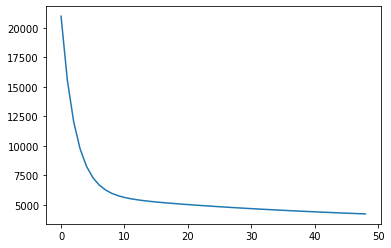

In [12]:
losses = []

for i in range(1, 50):
    dW, db = gradient(X_train, W, b, y_train)
    W -= L_rate * dW
    b -= L_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [13]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3660.9489807447167

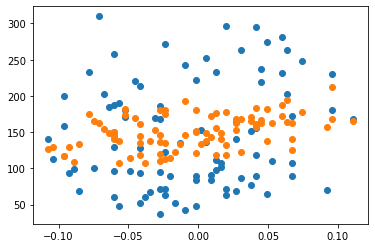

In [14]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()